In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
data = pd.read_csv('/content/IoTPond10.csv')

In [ ]:
data.head()

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


In [ ]:
data.drop(columns=['DISOLVED OXYGEN','created_at','entry_id', 'AMMONIA'], inplace=True)

In [ ]:
data.head()

,TEMPERATURE,TURBIDITY,pH,NITRATE,Population,Length,Weight
0,-127.0000,100,15.45166,0,50,13.45,27.6
1,-127.0000,100,15.45166,0,50,13.45,27.6
2,27.1250,100,6.01411,139,50,13.45,27.6
3,27.3125,100,6.03227,131,50,13.45,27.6
4,27.2500,100,6.03681,133,50,13.45,27.6


In [ ]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEMPERATURE  620 non-null    float64
 1   TURBIDITY    620 non-null    int64  
 2   pH           620 non-null    float64
 3   NITRATE      620 non-null    int64  
 4   Population   620 non-null    int64  
 5   Length       620 non-null    float64
 6   Weight       620 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 34.0 KB


TEMPERATURE    0
TURBIDITY      0
pH             0
NITRATE        0
Population     0
Length         0
Weight         0
dtype: int64

Text(0.5, 1.0, 'the corr between TEMPERATURE and pH')

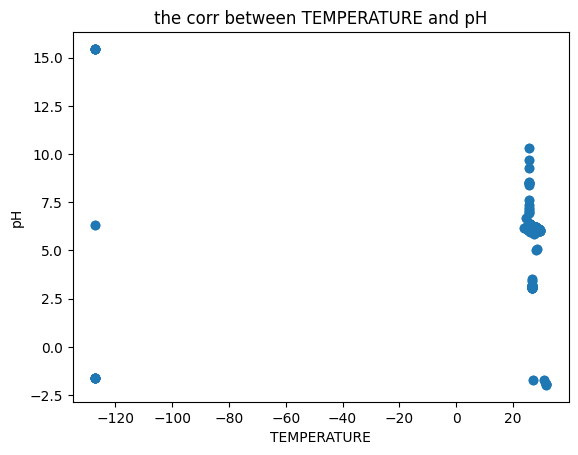

In [ ]:
plt.scatter(data['TEMPERATURE'] , data['pH'])
plt.xlabel('TEMPERATURE')
plt.ylabel('pH')
plt.title('the corr between TEMPERATURE and pH')

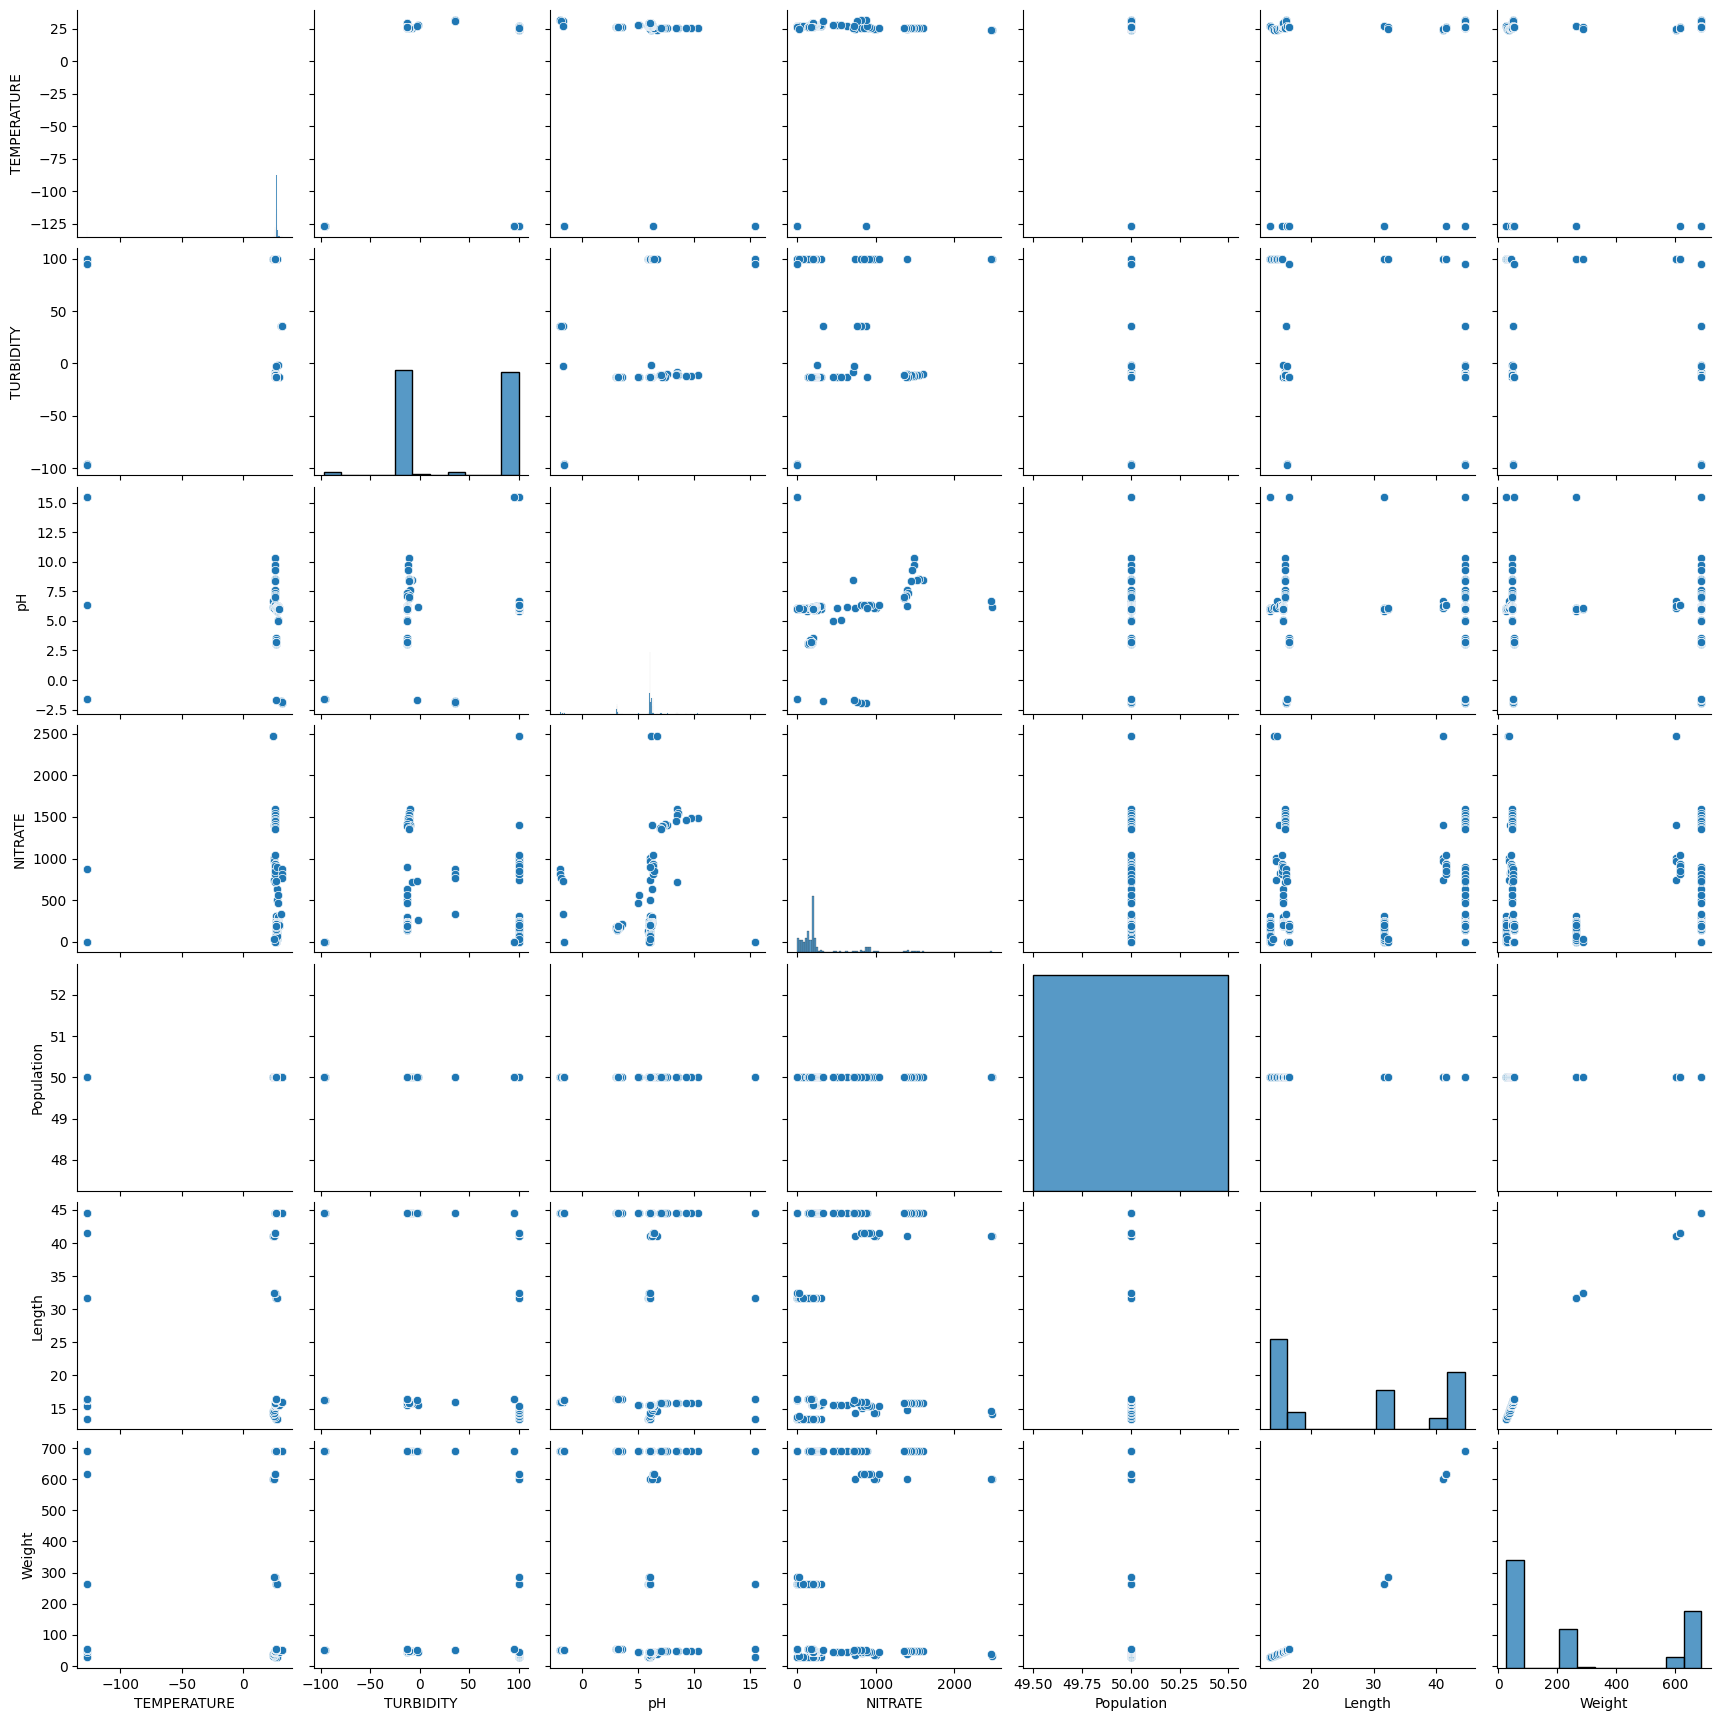

In [ ]:
sns.pairplot(data)

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9695113093658857
Test score 0.970235718180024


In [ ]:
y_pred = lreg.predict(X_test)

In [ ]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 0.7189 - mean_absolute_error: 0.7294 - val_loss: 0.5911 - val_mean_absolute_error: 0.6381
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4677 - mean_absolute_error: 0.5246 - val_loss: 0.3781 - val_mean_absolute_error: 0.4417
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3081 - mean_absolute_error: 0.3776 - val_loss: 0.2586 - val_mean_absolute_error: 0.3721
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2252 - mean_absolute_error: 0.3540 - val_loss: 0.1964 - val_mean_absolute_error: 0.3465
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1820 - mean_absolute_error: 0.3400 - val_loss: 0.1678 - val_mean_absolute_error: 0.3262
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1621 - mean_absolute_error: 0.3363 - val_loss: 0.1468 - val_mean_absolute_error: 0.3228
Epoch 7/50
13/13 [=========

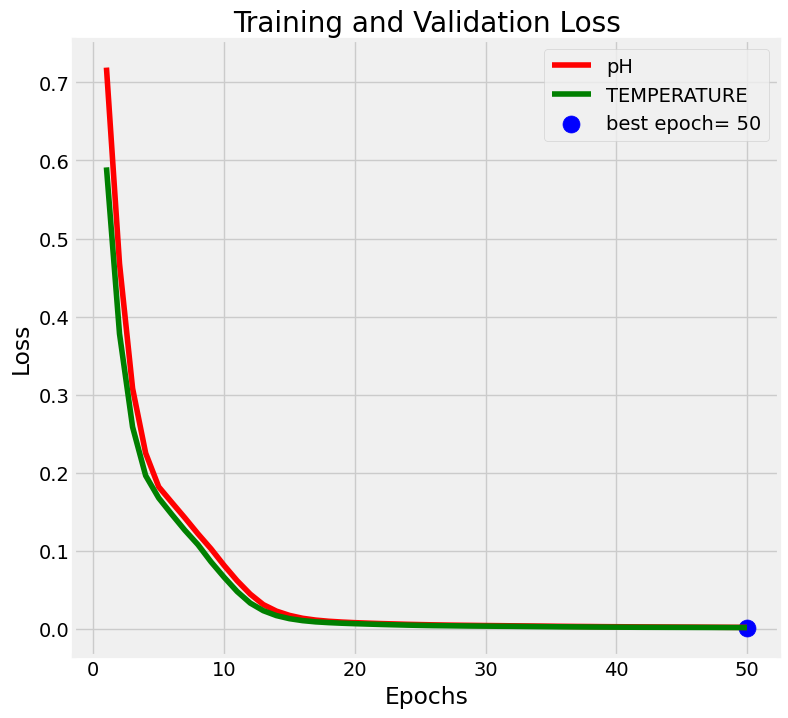

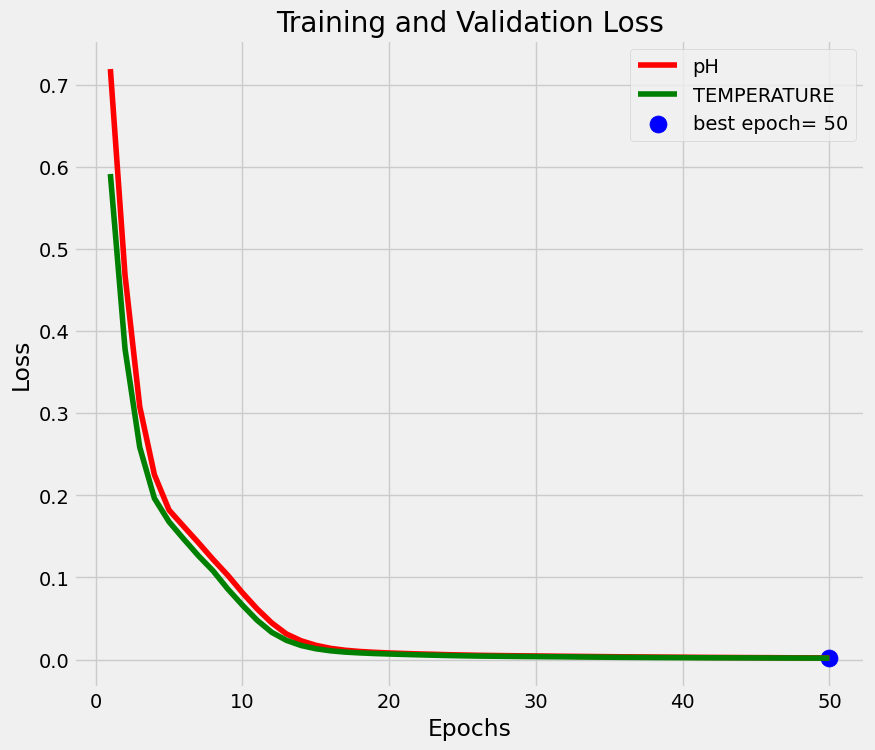

In [ ]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'pH')
plt.plot(Epochs, val_loss, 'g', label= 'TEMPERATURE')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'pH')
plt.plot(Epochs, val_loss, 'g', label= 'TEMPERATURE')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


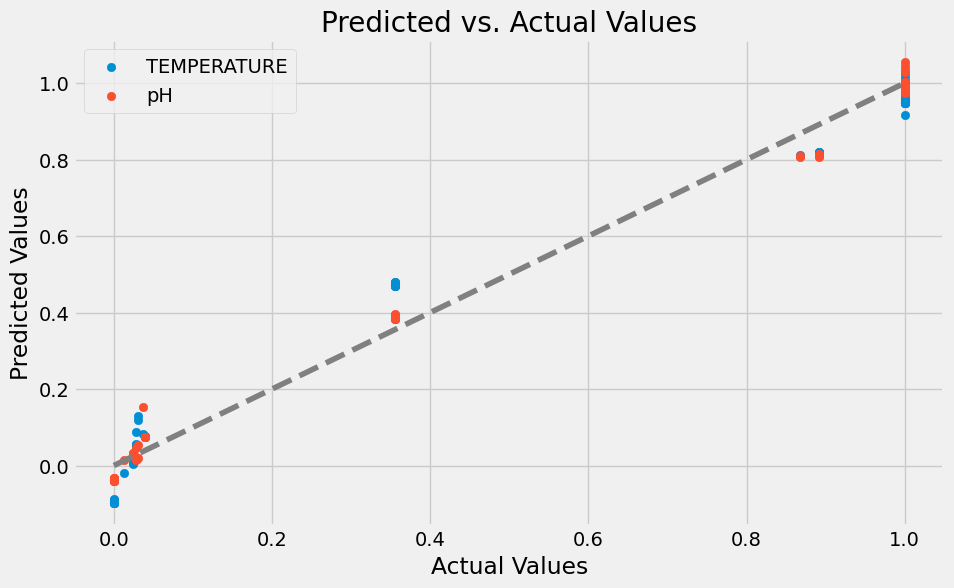

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='TEMPERATURE')
plt.scatter(y_test, ann_y_pred, label='pH')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

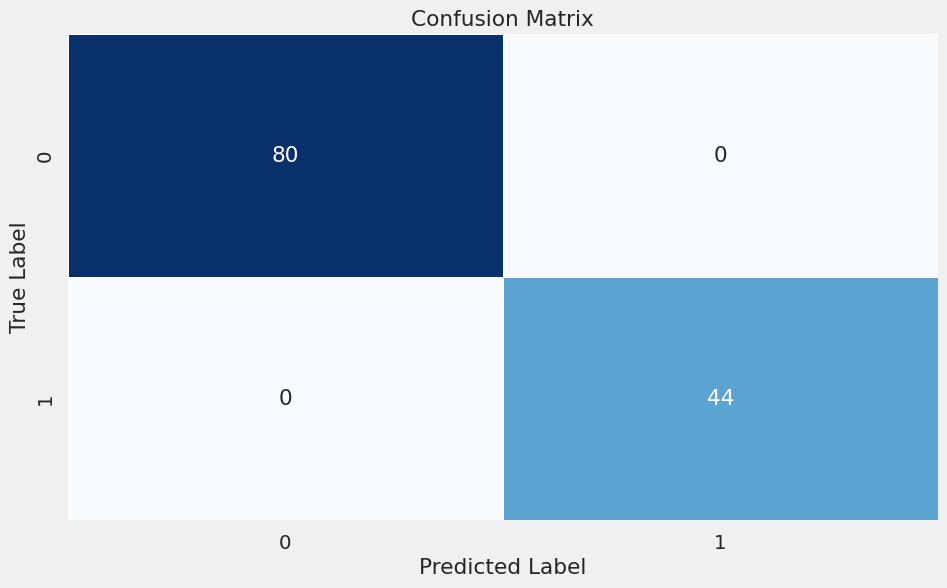

In [ ]:
threshold = 0.5  # Misalnya, gunakan nilai 0.5 sebagai threshold

# Convert predictions to class labels
y_pred_class = (y_pred > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test > threshold, y_pred > threshold)

# Visualize confusion matrix using heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
X = data.drop('TEMPERATURE', axis=1)
y = data['pH']

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Menampilkan classification performance
print('Classification Performance:')
print(classification_report(y_test, y_pred))

Classification Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       3.0
          12       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       2.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       2.0
          28       0.00      0.00      0.00       2.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
# Menampilkan loss performance
accuracy = accuracy_score(y_test, y_pred)
loss = 1 - accuracy
print(f'Loss Performance: {loss:.2f}')

Loss Performance: 1.00


In [ ]:
# Menampilkan classification result
print('Classification Result:')
result = pd.DataFrame({'Actual': encoder.inverse_transform(y_test), 'Predicted': encoder.inverse_transform(y_pred)})
print(result.head())

Classification Result:
    Actual  Predicted
0  6.01865   -1.95265
1  3.11793   -1.95265
2  6.03681   -1.95265
3  3.17695   -1.95265
4  6.05043   -1.95265


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kelompok 6

Ihsan Tri Nugroho.		  	  (5311422139)

M.Rangga Meitama.		        (5311422140)

Krishna Arya Bagaskara.		  (5311422141)

Gabriel Semangat Nababan  	(5311422143)

Evan Athalla Pratama.		    (5311422143)

Aditya Puspa Ramaninda.   	(5311422144)